# 基于机器学习的防火墙异常行为识别模型

4分类问题，数据来源于网络


# 认识数据

In [104]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(font='SimHei')
import warnings
warnings.filterwarnings('ignore')
 
df = pd.read_csv('互联网防火墙数据集.csv')
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [105]:
df.shape

(65532, 12)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


以下是对该数据集中各特征的含义解释：
其中action是表标签
| 特征名称 | 含义 |
| ---- | ---- |
| Source Port | 源端口，指的是数据包从发送方设备（如计算机、服务器等）发出时所使用的端口号。端口号用于标识发送方设备上的特定应用程序或服务。例如，常见的 HTTP 服务使用端口 80，FTP 服务使用端口 21 等。 |
| Destination Port | 目标端口，即数据包要发送到的目标设备上的端口号。它用于指定数据包将被传递到目标设备上的哪个应用程序或服务。 |
| NAT Source Port | NAT（网络地址转换）源端口。当网络中使用 NAT 技术时，会对内部网络设备的源地址和端口进行转换，NAT 源端口就是转换后的源端口号。通过 NAT 可以实现内部网络共享一个或少数几个公网 IP 地址进行对外通信。 |
| NAT Destination Port | NAT 目标端口，是经过 NAT 转换后，数据包所指向的目标端口号。在一些情况下，NAT 不仅会转换源地址和端口，也可能会对目标地址和端口进行转换，以适应不同的网络环境或实现特定的网络策略。 |
| Action | 动作，这是一个对象类型的特征，可能包含了防火墙对该网络连接或数据包所采取的操作。例如，你之前将其值 “allow” 表示允许通过，“drop” 表示丢弃，“deny” 表示拒绝，“reset-both” 可能表示重置连接双方等操作。 |
| Bytes | 字节数，通常指的是整个网络连接或数据包传输过程中所涉及的总字节数，包含了发送和接收的所有数据的大小。 |
| Bytes Sent | 发送的字节数，即从本地设备（作为发送方）向目标设备发送的数据量，以字节为单位。 |
| Bytes Received | 接收的字节数，指本地设备（作为接收方）从发送方接收到的数据量，单位是字节。 |
| Packets | 数据包数量，统计在该网络连接或传输过程中所涉及的数据包的总数目。 |
| Elapsed Time (sec) | 经过的时间（秒），表示该网络连接或数据传输过程从开始到结束所经历的时间长度，单位为秒。 |
| pkts_sent | 发送的数据包数量，与 “Packets” 中发送部分的含义类似，更明确地表示本地设备作为发送方所发出的数据包的数量。 |
| pkts_received | 接收的数据包数量，明确指出本地设备作为接收方接收到的数据包的数量。 | 

In [108]:
# 查看是否有缺失值
df.isnull().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Action                  0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
dtype: int64

In [110]:
# 统计重复情况
df.duplicated().sum()

8362

In [111]:
# 删除重复数据
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

# 数据可视化


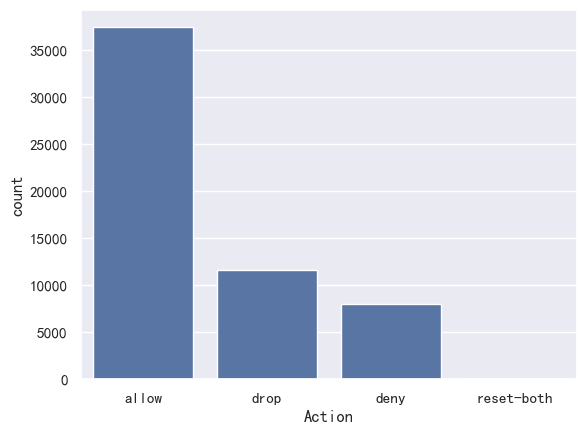

In [112]:
sns.countplot(data=df,x='Action')
plt.show()

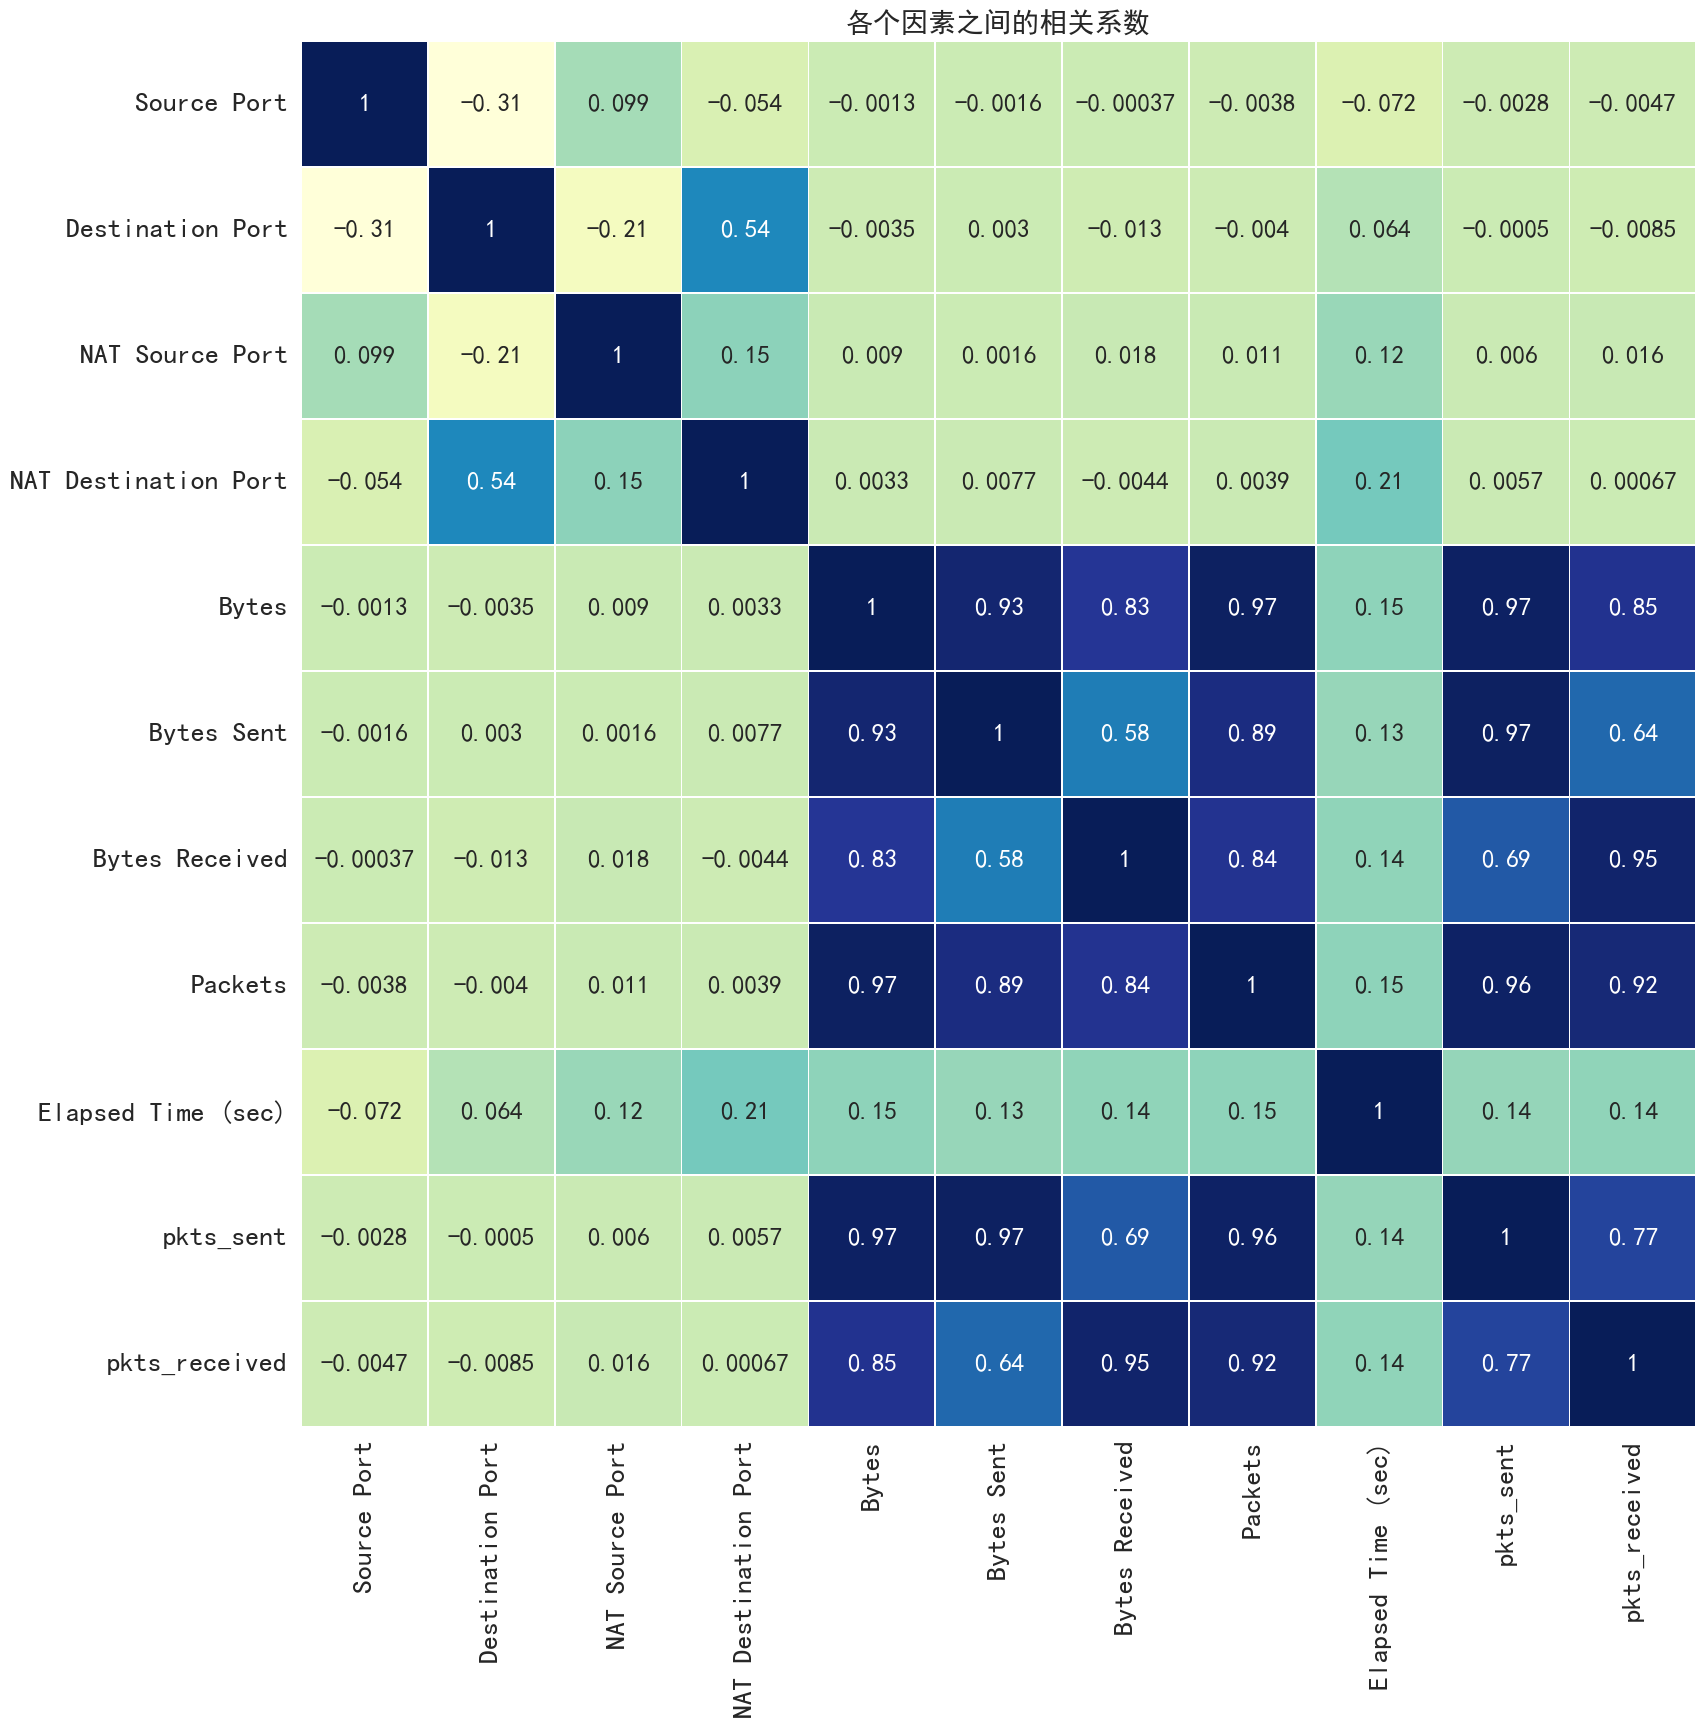

In [114]:
# 筛选出数值列
numeric_df = df.select_dtypes(include=[np.number])

fig = plt.figure(figsize=(18, 18))
sns.heatmap(numeric_df.corr(), vmax=1, annot=True, linewidths=0.5, cbar=False, cmap='YlGnBu', annot_kws={'fontsize': 18})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('各个因素之间的相关系数', fontsize=20)
plt.show()

# 特征工程

标签不是数值，需要数值化

In [116]:
df['Action'].value_counts()

Action
allow         37439
drop          11635
deny           8042
reset-both       54
Name: count, dtype: int64

In [119]:
df['Action'].replace(to_replace={'allow': 0, 'drop': 1, 'deny': 2, 'reset-both': 3}, inplace=True)

df['Action'].value_counts()

Action
0    37439
1    11635
2     8042
3       54
Name: count, dtype: int64

In [121]:
# 准备用于创建模型的数据
from sklearn.model_selection import train_test_split
X = df.drop('Action', axis=1)
y = df["Action"]
# 划分数据集
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print('训练集大小：',X_train.shape[0])
print('测试集大小：',X_test.shape[0])

训练集大小： 45736
测试集大小： 11434


## 逻辑回归

In [122]:
# 构建逻辑回归模型
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
print('逻辑回归模型准确率：',lr.score(X_test,y_test))

逻辑回归模型准确率： 0.9814588070666433


In [123]:
# 构建KNN模型
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
print('KNN模型准确率：',knn.score(X_test,y_test))

KNN模型准确率： 0.993877907993703


In [124]:
# 构建决策树模型
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
print('决策树模型准确率：',tree.score(X_test,y_test))

决策树模型准确率： 0.9971138709113171


In [131]:
from lightgbm import LGBMClassifier
# 构建 LightGBM 模型
lgbm = LGBMClassifier()

# 训练模型
lgbm.fit(X_train, y_train)

# 评估模型准确率
accuracy = lgbm.score(X_test, y_test)
print('LightGBM 模型准确率：', accuracy)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000863 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 45736, number of used features: 11
[LightGBM] [Info] Start training from score -0.421388
[LightGBM] [Info] Start training from score -1.597830
[LightGBM] [Info] Start training from score -1.962378
[LightGBM] [Info] Start training from score -6.902000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM 模型准确率： 0.9983382893125765


In [125]:
# 构建xgboost模型
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
print('xgboost模型准确率：',xgb.score(X_test,y_test))

xgboost模型准确率： 0.998600664684275


In [126]:
from sklearn.metrics import r2_score,confusion_matrix,classification_report,auc,roc_curve
# 模型评估
y_pred = xgb.predict(X_test)
print('模型的R方值：',r2_score(y_test,y_pred))
print('模型混淆矩阵:','\n',confusion_matrix(y_test,y_pred))
print('模型分类报告:','\n',classification_report(y_test,y_pred))

模型的R方值： 0.9969034757638603
模型混淆矩阵: 
 [[7430    0    0    0]
 [   0 2381    0    0]
 [   1    7 1606    1]
 [   0    0    7    1]]
模型分类报告: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7430
           1       1.00      1.00      1.00      2381
           2       1.00      0.99      1.00      1615
           3       0.50      0.12      0.20         8

    accuracy                           1.00     11434
   macro avg       0.87      0.78      0.80     11434
weighted avg       1.00      1.00      1.00     11434



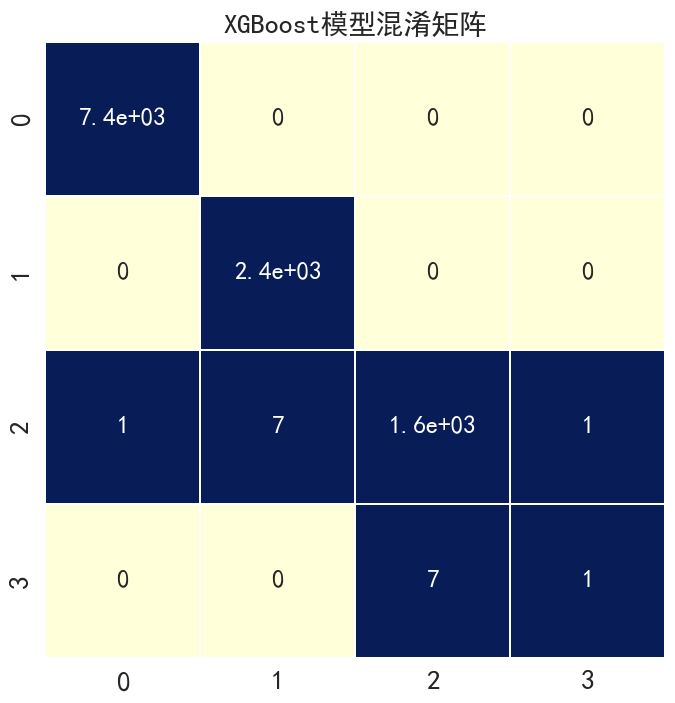

In [127]:
# 混淆矩阵可视化
fig = plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,y_pred),vmax=1,annot=True,linewidths=0.5,cbar=False,cmap='YlGnBu',annot_kws={'fontsize':18})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('XGBoost模型混淆矩阵',fontsize=20)
plt.show()

1 Elapsed Time (sec) 0.8470162
2 Destination Port 0.05523613
3 Bytes 0.045818143
4 Packets 0.039385244
5 NAT Destination Port 0.005281363
6 pkts_sent 0.0033125912
7 NAT Source Port 0.001968568
8 Bytes Received 0.000952969
9 pkts_received 0.00040827206
10 Bytes Sent 0.00035286695
11 Source Port 0.00026755093


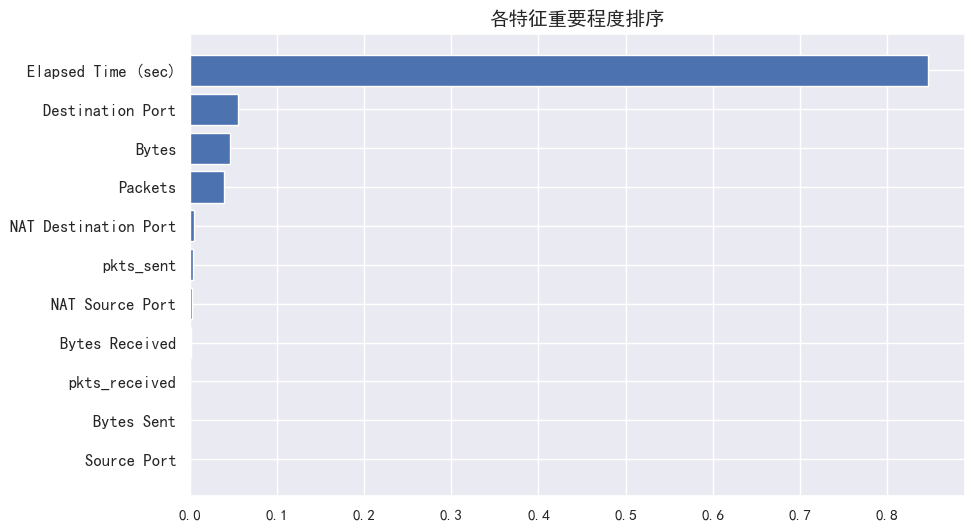

In [128]:
#打印特征重要性评分
feat_labels = X_train.columns[0:]
importances = xgb.feature_importances_
indices = np.argsort(importances)[::-1]
index_list = []
value_list = []
for f,j in zip(range(X_train.shape[1]),indices):
    index_list.append(feat_labels[j])
    value_list.append(importances[j])
    print(f + 1, feat_labels[j], importances[j])
plt.figure(figsize=(10,6))
plt.barh(index_list[::-1],value_list[::-1])
plt.yticks(fontsize=12)
plt.title('各特征重要程度排序',fontsize=14)
plt.show()

# 机器学习可解释性分析

原则上挑选表现最好的模型，对其利用shap


In [132]:
# shap解释需要计算shap值，才可以后续可视化
import shap
import lightgbm as lgb

# 使用最佳参数重新训练一个新的 LightGBM 模型
best_params = {'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 63}
lgb_best = lgb.LGBMClassifier(**best_params)
lgb_best.fit(X_train, y_train)

# 使用 shap 进行解释
# 创建一个 SHAP 解释器，使用训练好的 LightGBM 模型
explainer = shap.Explainer(lgb_best)

# 计算 SHAP 值，使用训练集
shap_values = explainer.shap_values(X_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000583 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 45736, number of used features: 11
[LightGBM] [Info] Start training from score -0.421388
[LightGBM] [Info] Start training from score -1.597830
[LightGBM] [Info] Start training from score -1.962378
[LightGBM] [Info] Start training from score -6.902000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

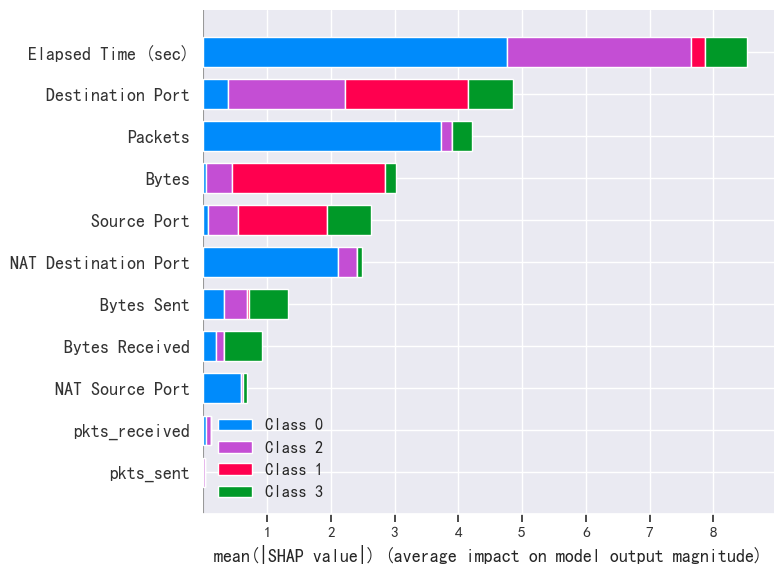

In [133]:
# 可视化所有类别的SHAP 汇总图
shap.summary_plot(shap_values, X_train)

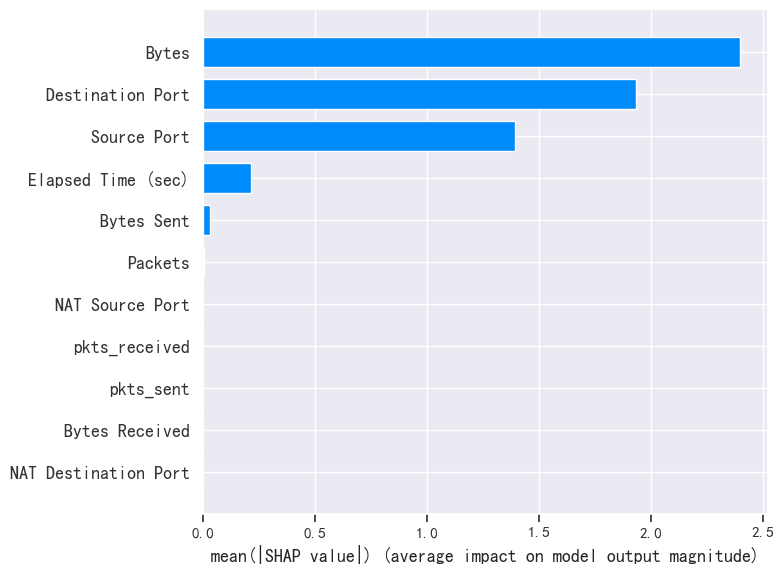

In [134]:
# SHAP 汇总图设置为条形图，可以显示特征重要性
shap.summary_plot(shap_values[1], X_train, plot_type="bar")

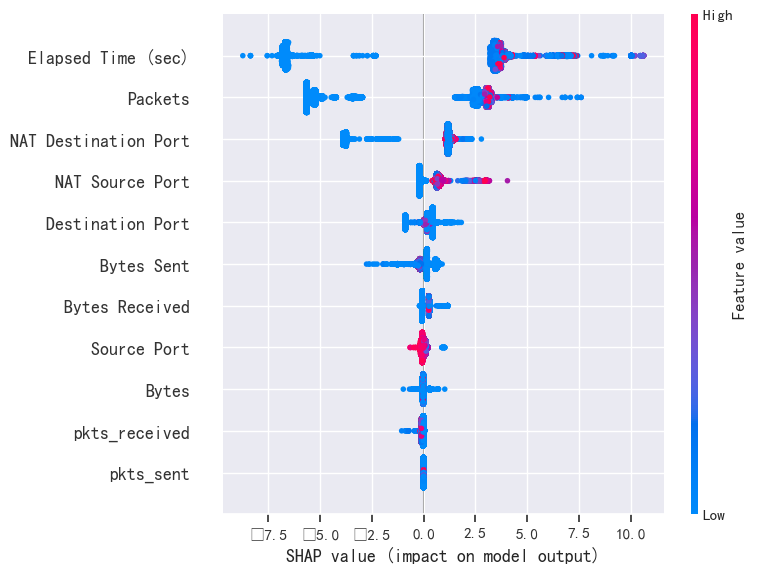

In [135]:
# SHAP 汇总图默认设置为点图，可以反应特征的重要性和影响方向
shap.summary_plot(shap_values[0], X_train,plot_type="dot", max_display=15)